In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel
from statannot import add_stat_annotation


In [2]:
df = pd.read_excel('/Users/shouyuling/Library/CloudStorage/OneDrive-UniversityofPittsburgh/Postdoc/Projects/Gensight/Data/VEPTask/Results/AllSub_results_BCP.xlsx')
df

,Subjid,Task,ElecGroup,Condition,FreqGroup,Stimuli,Accuracy
0,BCP001,VEP,All_electrodes,6Hz,1to40,Control,31.818182
1,BCP001,VEP,All_electrodes,6Hz,1to40,Disc,26.666667
2,BCP001,VEP,All_electrodes,6Hz,1to40,VerticalBar,26.666667
3,BCP001,VEP,All_electrodes,6Hz,1to40,HorizontalBar,20.930233
4,BCP001,VEP,All_electrodes,6Hz,1to40,All,26.520437
5,BCP002,VEP,All_electrodes,6Hz,1to40,Control,22.500000
6,BCP002,VEP,All_electrodes,6Hz,1to40,Disc,23.157895
7,BCP002,VEP,All_electrodes,6Hz,1to40,VerticalBar,25.384615
8,BCP002,VEP,All_electrodes,6Hz,1to40,HorizontalBar,28.918919
9,BCP002,VEP,All_electrodes,6Hz,1to40,All,24.990357


In [3]:
df.dtypes

Subjid        object
Task          object
ElecGroup     object
Condition     object
FreqGroup     object
Stimuli       object
Accuracy     float64
dtype: object

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


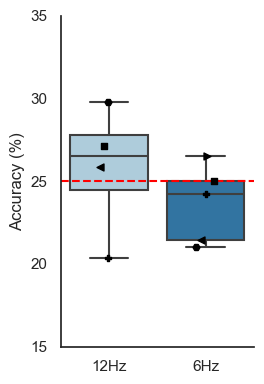

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation

# Close any existing plots to prevent overlap
plt.close()
sns.set_theme(style="white", palette='Paired')

# Filter the data
data = df[df['Stimuli'] == 'All']

# Create the boxplot
g = sns.catplot(
    data=data, kind='box', showfliers=False,
    y='Accuracy', #x='Stimuli',
    x='Condition', order=['12Hz', '6Hz'],
    palette='Paired',
    height=4, aspect=.7
)


# Define custom markers for each subject
unique_subjects = data['Subjid'].unique()
markers = ['>', 's', 'H','P', '<']
subject_markers = {subject: markers[i % len(markers)] for i, subject in enumerate(unique_subjects)}

# Overlay each subject with its custom marker
for subject, marker in subject_markers.items():
    sns.stripplot(
        data=data[data['Subjid'] == subject],
        y='Accuracy',
        x='Condition', order=['12Hz', '6Hz'],
        marker=marker, color='none', edgecolor='gray', linewidth=1, dodge=True, ax=g.ax
    )

# Remove the additional legends created by stripplot
handles, labels = g.ax.get_legend_handles_labels()
unique_handles_labels = list(dict(zip(labels, handles)).items())  # Remove duplicates
g.ax.legend(*zip(*unique_handles_labels), title=None, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

# Customize the plot limits and labels
g.set(ylim=[15, 35])
g.set(yticks=[15, 20, 25, 30, 35])
g.refline(y=25, color='red')
g.set_ylabels('Accuracy (%)', fontsize=12)
g.set_xlabels('')


# Define pairs for statistical comparison between conditions for each stimuli type
pairs = [
    (('12Hz'), ('6Hz'))
]

# Customize the appearance of the plot
plt.tight_layout()
plt.show()


/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


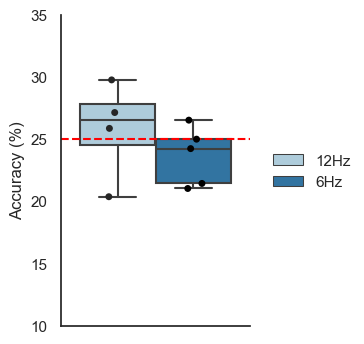

In [6]:
plt.close()
sns.set_theme(style="white",palette='Paired')

data=df[df['Stimuli']=='All']
g = sns.catplot(data=data,kind='box',#showfliers=False,
            y='Accuracy',x='Stimuli',
            hue='Condition',hue_order=['12Hz','6Hz'],
            palette='Paired',
            height=4, aspect=.7)
g.map_dataframe(sns.stripplot,
            y='Accuracy',x='Stimuli',
            hue='Condition',hue_order=['12Hz','6Hz'],
            color='k',dodge=True)
g.set(ylim=[10,35])
g.set(yticks=[10,15,20,25,30,35])
g.refline(y=25,color='red')
g.set_ylabels('Accuracy (%)',fontsize=12)
g.set_xlabels('')
g.set_xticklabels('')
g._legend.set_title('')
plt.show()

In [6]:
data

,Subjid,Task,ElecGroup,Condition,FreqGroup,Stimuli,Accuracy
4,BCP001,VEP,All_electrodes,6Hz,1to40,All,26.520437
9,BCP002,VEP,All_electrodes,6Hz,1to40,All,24.990357
14,BCP002,VEP,All_electrodes,12Hz,1to40,All,27.134269
19,BCP003,VEP,All_electrodes,6Hz,1to40,All,21.022792
24,BCP003,VEP,All_electrodes,12Hz,1to40,All,29.758919
29,BCP004,VEP,All_electrodes,6Hz,1to40,All,24.230769
34,BCP004,VEP,All_electrodes,12Hz,1to40,All,20.360399
39,BCP005,VEP,All_electrodes,6Hz,1to40,All,21.428571
44,BCP005,VEP,All_electrodes,12Hz,1to40,All,25.859557


In [8]:
ttest_1samp(data['Accuracy'],25)

TtestResult(statistic=-0.39077424902850855, pvalue=0.7061645629486849, df=8)

In [7]:
df

,Subjid,Task,ElecGroup,Condition,FreqGroup,Stimuli,Accuracy
0,BCP001,VEP,All_electrodes,6Hz,1to40,Control,31.818182
1,BCP001,VEP,All_electrodes,6Hz,1to40,Disc,26.666667
2,BCP001,VEP,All_electrodes,6Hz,1to40,VerticalBar,26.666667
3,BCP001,VEP,All_electrodes,6Hz,1to40,HorizontalBar,20.930233
4,BCP001,VEP,All_electrodes,6Hz,1to40,All,26.520437
5,BCP002,VEP,All_electrodes,6Hz,1to40,Control,22.500000
6,BCP002,VEP,All_electrodes,6Hz,1to40,Disc,23.157895
7,BCP002,VEP,All_electrodes,6Hz,1to40,VerticalBar,25.384615
8,BCP002,VEP,All_electrodes,6Hz,1to40,HorizontalBar,28.918919
9,BCP002,VEP,All_electrodes,6Hz,1to40,All,24.990357


In [23]:
data = df[df['Stimuli'] != 'All']
data = data.groupby(['Subjid','Stimuli']).mean().reset_index()
data['GogglesCondition'] = 'GogglesOFF'
data

/var/folders/rs/n33pf7596cx4ct90ds732pq80000gn/T/ipykernel_92685/2482374527.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['Subjid','Stimuli']).mean().reset_index()


,Subjid,Stimuli,Accuracy,GogglesCondition
0,BCP001,Control,31.818182,GogglesOFF
1,BCP001,Disc,26.666667,GogglesOFF
2,BCP001,HorizontalBar,20.930233,GogglesOFF
3,BCP001,VerticalBar,26.666667,GogglesOFF
4,BCP002,Control,26.726190,GogglesOFF
5,BCP002,Disc,20.881273,GogglesOFF
6,BCP002,HorizontalBar,28.095823,GogglesOFF
7,BCP002,VerticalBar,28.545966,GogglesOFF
8,BCP003,Control,24.358974,GogglesOFF
9,BCP003,Disc,24.581940,GogglesOFF


/var/folders/rs/n33pf7596cx4ct90ds732pq80000gn/T/ipykernel_92685/1716874735.py:35: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  g.ax.legend(*zip(*unique_handles_labels), title=None, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


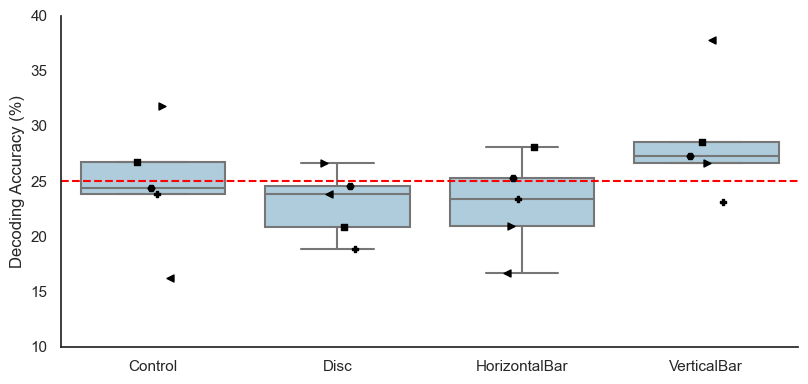

In [28]:

# Close any existing plots to prevent overlap
plt.close()

# Filter the data
#data = df[df['Stimuli'] != 'All']

# Create the boxplot
g = sns.catplot(
    data=data, kind='box', showfliers=False,
    y='Accuracy', x='Stimuli',                
    order=['Control','Disc','HorizontalBar','VerticalBar'],
    hue='GogglesCondition',# hue_order=['12Hz', '6Hz'],
    palette='Paired',
    height=4, aspect=1.7
)

# Define custom markers for each subject
unique_subjects = data['Subjid'].unique()
markers = ['>', 's', 'H','P', '<']
subject_markers = {subject: markers[i % len(markers)] for i, subject in enumerate(unique_subjects)}

# Overlay each subject with its custom marker
for subject, marker in subject_markers.items():
    sns.stripplot(
        data=data[data['Subjid'] == subject],
        y='Accuracy', x='Stimuli',                
        order=['Control','Disc','HorizontalBar','VerticalBar'],
        #hue='Condition', hue_order=['12Hz', '6Hz'],
        marker=marker, color='none', edgecolor='gray', linewidth=1, dodge=True, ax=g.ax
    )

# Remove the additional legends created by stripplot
handles, labels = g.ax.get_legend_handles_labels()
unique_handles_labels = list(dict(zip(labels, handles)).items())  # Remove duplicates
g.ax.legend(*zip(*unique_handles_labels), title=None, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)

# Remove the duplicate legend
g._legend.set_title('')
g.set_xlabels('')
g._legend.remove()
#sns.move_legend(g,'upper center')
#handles, labels = g.ax.get_legend_handles_labels()
#unique_labels_handles = dict(zip(labels, handles))
#g.ax.legend(unique_labels_handles.values(), unique_labels_handles.keys(), title='')

# Customize the plot limits and labels
g.set(ylim=[10, 40])
g.set(yticks=[10, 15, 20, 25, 30, 35, 40])
g.refline(y=25, color='red')
g.set_ylabels('Decoding Accuracy (%)', fontsize=12)


# Show the plot
plt.tight_layout()
plt.show()


/Users/shouyuling/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


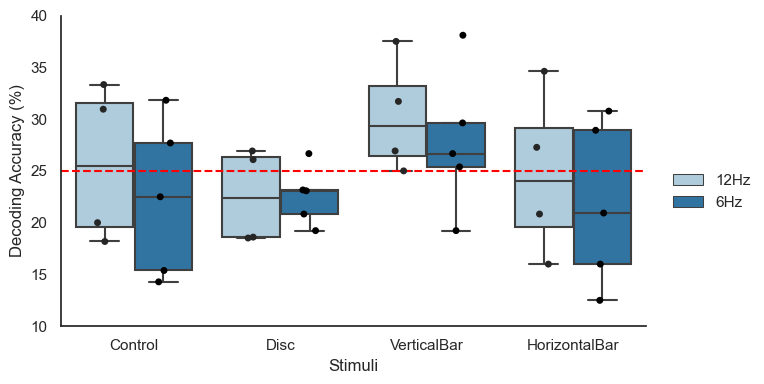

In [11]:
plt.close()
data=df[df['Stimuli']!='All']
g = sns.catplot(data=data,kind='box',showfliers=False,
            y='Accuracy',x='Stimuli',                
            order=['Control','Disc','VerticalBar','HorizontalBar'],
            hue='Condition',hue_order=['12Hz','6Hz'],
            palette='Paired',
            height=4, aspect=1.7)
g.map_dataframe(sns.stripplot,
                y='Accuracy',x='Stimuli',
                order=['Control','Disc','VerticalBar','HorizontalBar'],
                hue='Condition',hue_order=['12Hz','6Hz'],
            color='k',dodge=True)
#sns.move_legend(g, "upper center")
g._legend.set_title('')
g.set(ylim=[10,40])
g.set(yticks=[10,15,20,25,30,35,40])
g.refline(y=25,color='red')
g.set_ylabels('Decoding Accuracy (%)',fontsize=12)
plt.show()


In [206]:
data[data['Stimuli']=='HorizontalBar']

,Subjid,GogglesCondition,HasOffData,Stimuli,FeatureType,ElecGroup,FreqGroup,Session,Accuracy
403,1001,GogglesON,Yes,HorizontalBar,all_1to40,all,1to40,2.0,24.444444
653,1002,GogglesON,NO,HorizontalBar,all_1to40,all,1to40,2.0,33.333333
903,1004,GogglesON,NO,HorizontalBar,all_1to40,all,1to40,2.0,31.111111
1403,4006,GogglesON,Yes,HorizontalBar,all_1to40,all,1to40,3.0,33.333333
1903,4010,GogglesON,Yes,HorizontalBar,all_1to40,all,1to40,4.0,31.111111


In [207]:
ttest_1samp(data[data['Stimuli']=='HorizontalBar']['Accuracy'],25)

TtestResult(statistic=3.4701104689428353, pvalue=0.02558104515003594, df=4)

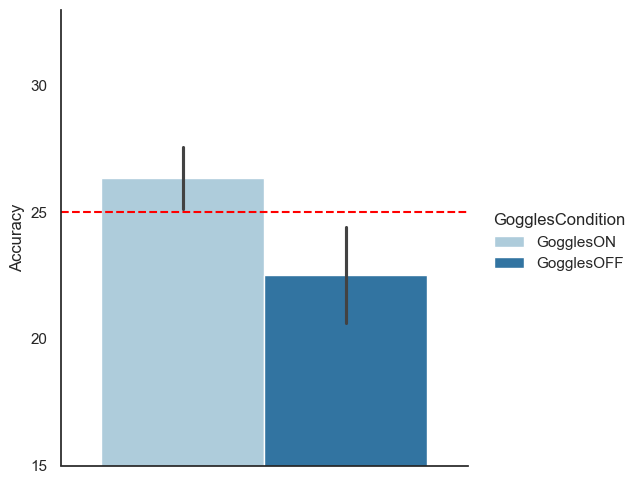

In [242]:
g = sns.catplot(data=df[df['FeatureType']=='occi_1to40'],kind='bar',
            hue='GogglesCondition',y='Accuracy',hue_order=['GogglesON','GogglesOFF'],
            errorbar='se',
            palette='Paired')
g.set(ylim=[15,33])
g.set(yticks=[15,20,25,30])
g.refline(y=25,color='red')


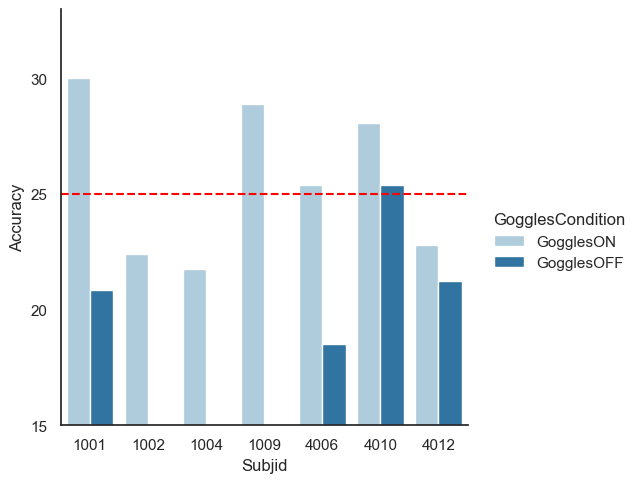

In [288]:
g = sns.catplot(data=df[df['FeatureType']=='occi_1to40'],kind='bar',
            hue='GogglesCondition',y='Accuracy',hue_order=['GogglesON','GogglesOFF'],
            x='Subjid',
            errorbar=None,
            palette='Paired')
g.set(ylim=[15,33])
g.set(yticks=[15,20,25,30])
g.refline(y=25,color='red')
